In [3]:
import pandas as pd
from sklearn import datasets
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score


from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import linkage_tree
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster



iris = datasets.load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# 1a. Obtenga un resumen estadístico de los datos

iris_df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
def plot_dendrogram(model, **kwargs):
    '''
    Esta función extrae la información de un modelo AgglomerativeClustering y representa su dendograma con la función dendrogram de scipy.cluster.hierarchy
    '''
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # nodo hoja
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot
    dendrogram(linkage_matrix, **kwargs)


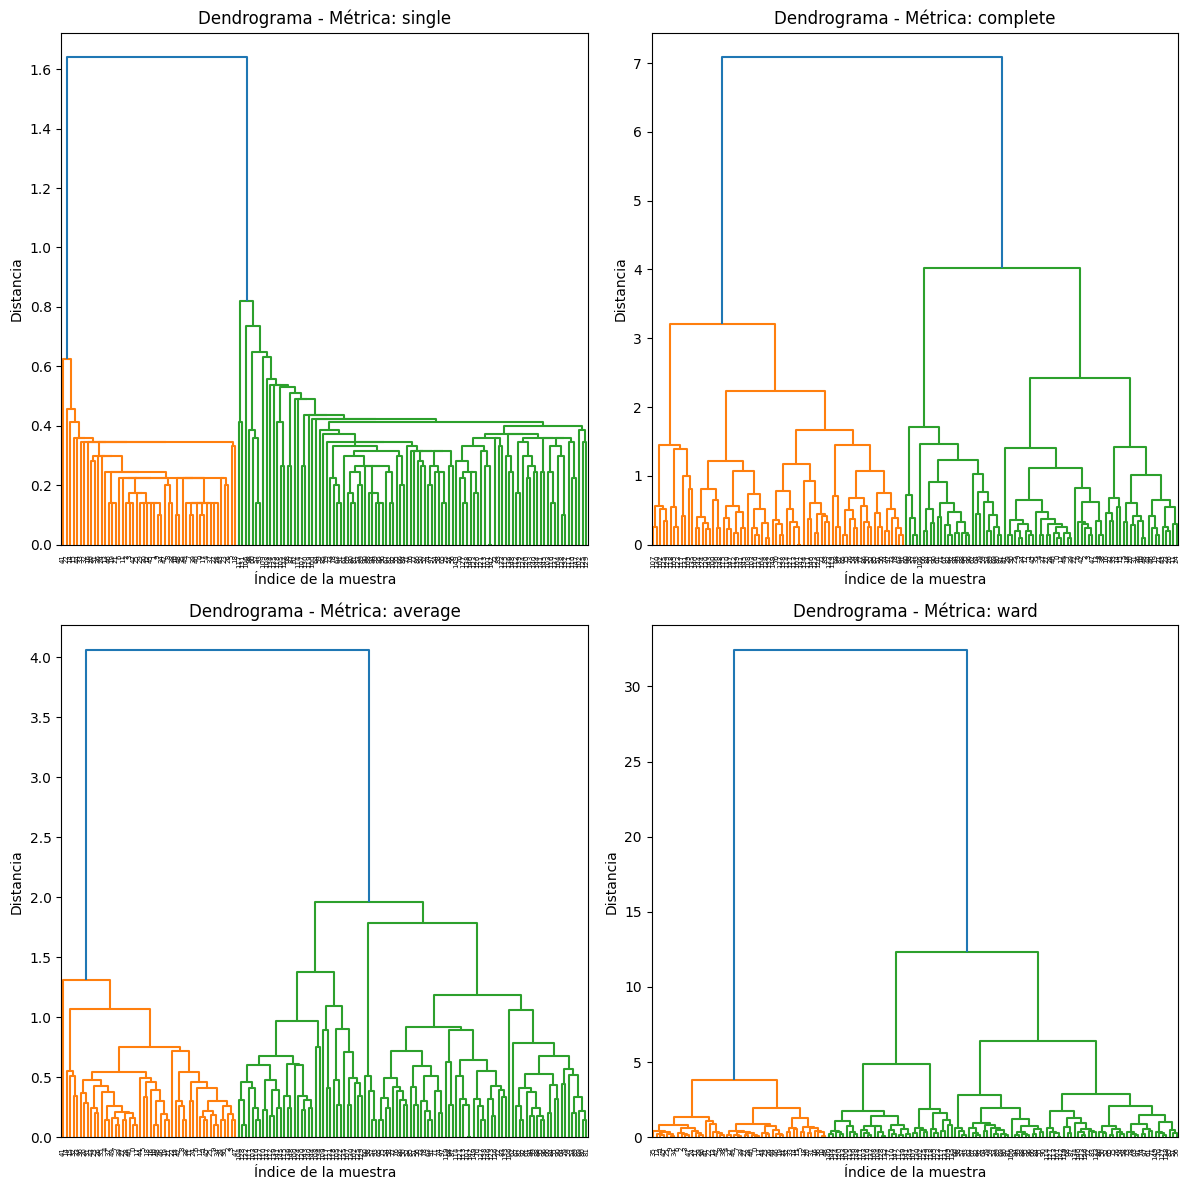

In [9]:
#● Para la siguiente clasificación construya un dendrograma, con distintas métricas.

# Cargar los datos y prepararlos para el clustering
X = iris_df.drop(['target'], axis=1)
# Generar la matriz de enlace (linkage matrix) utilizando distintas métricas
methods = ['single', 'complete', 'average', 'ward']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

for i, method in enumerate(methods):
    Z = linkage(X, method)
    ax = axes[i // 2, i % 2]
    ax.set_title(f'Dendrograma - Métrica: {method}')
    ax.set_xlabel('Índice de la muestra')
    ax.set_ylabel('Distancia')
    dendrogram(Z, ax=ax)

plt.tight_layout()
plt.show()

C:\Users\bebit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bebit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bebit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

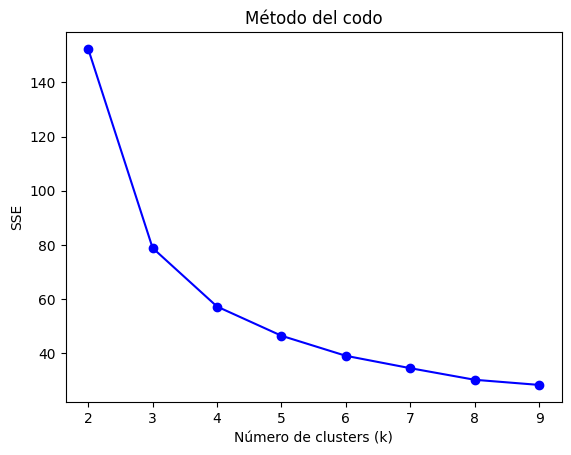

In [10]:
#Establezca el k adecuado para estos datos.

# Datos
X = iris_df.drop(['target'], axis=1)

# Calcular SSE para diferentes valores de k
sse_scores = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse_scores.append(kmeans.inertia_)

# Graficar SSE en función de k
plt.plot(k_values, sse_scores, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE')
plt.title('Método del codo')
plt.show()



C:\Users\bebit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bebit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bebit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

El valor de k que maximiza el coeficiente de silhouette es: 2


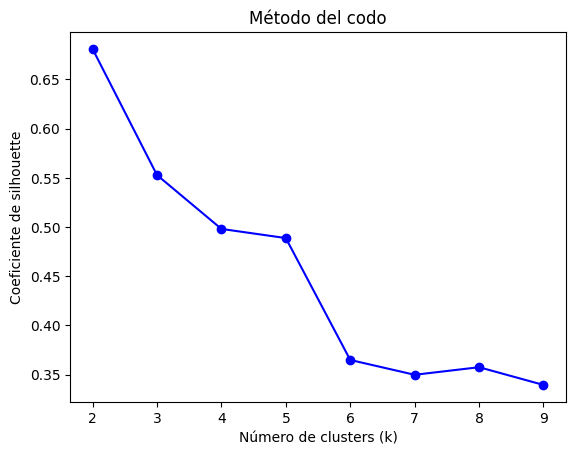

In [16]:



# Datos
X = iris_df.drop(['target'], axis=1)

# Calcular el coeficiente de silhouette para diferentes valores de k
silhouette_scores = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Obtener el valor de k que maximiza el coeficiente de silhouette
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]

print("El valor de k que maximiza el coeficiente de silhouette es:", best_k)

# Graficar silhouette en función de k
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Coeficiente de silhouette')
plt.title('Método del codo')
plt.show()


In [ ]:
#Preguntas guia

#Dendrogramas
#es un tipo de gráfico que muestra la estructura de agrupación de datos. Se utiliza para visualizar cómo los elementos se agrupan entre sí de forma jerárquica. 
#En el dendrograma, los objetos similares se agrupan en ramas y las ramas se fusionan a medida que se van formando grupos más grandes. La altura de las fusiones 
#en el dendrograma indica qué tan diferentes son los grupos. Es una herramienta útil para comprender las relaciones de agrupación en los datos y encontrar 
#patrones o subgrupos.

#Cluster
#En términos simples, es un grupo o conjunto de elementos similares. Imagina que tienes una caja llena de diferentes objetos y quieres organizarlos. 
#Si agrupas los objetos similares juntos en base a sus características, estás creando clusters. Por ejemplo, puedes agrupar los juguetes en un cluster, 
#los libros en otro cluster y la ropa en otro cluster. Cada cluster representa un grupo de objetos que comparten ciertas similitudes entre sí. 
#El objetivo de la técnica de clustering es identificar y agrupar automáticamente los elementos similares en conjuntos separados, lo que nos permite 
#entender mejor los datos y encontrar patrones ocultos.

#Agrupación jerárquica
#Es un método de análisis de datos que busca agrupar elementos similares en diferentes niveles de jerarquía. Se representa mediante un árbol o dendrograma, 
#donde cada nivel representa un grupo o clúster. Puede utilizarse para explorar la estructura de los datos y no requiere conocer de antemano el número de grupos. 
#Es útil para visualizar cómo se agrupan los elementos y facilita la interpretación de los resultados.